 # Check time elapsed with every amount of data
 - 100
 - 200
 - 300
 - 400
 - 500
 - 1000
 - 2000
 - 3000

In [1]:
import numpy as np
import pandas as pd
import time

from algorithm.util.read_pairs_data import read_data_db
from algorithm.util.directed_graph import DirectedGraph

from algorithm.first_accept_n_way import FirstAcceptNWay
from algorithm.priority_based_n_way import PriorityBasedNWay
from algorithm.edmonds import EdmondsAlgorithm

In [2]:
base_data_date = "2021/01/"
data = []

for i in range(1, 2):
    data_date = base_data_date + str(i).zfill(2)
    data.append(read_data_db(data_date))

In [3]:
data = pd.concat(data, axis=0)
data.head()

,pair_num,donor_bloodtype,recipient_bloodtype,pra
0,100,A,B,50
1,P0,A,O,90
2,P1,B,A,5
3,P2,A,O,90
4,P3,A,A,92


In [4]:
data.shape

(101, 4)

In [5]:
a = time.time()
g = DirectedGraph(data)
print(time.time() - a, "s")

0.09203433990478516 s


In [6]:
edmond = EdmondsAlgorithm(100)
fanway1 = FirstAcceptNWay(5, 'maximum')
fanway2 = FirstAcceptNWay(5, 'exact')
prio1 = PriorityBasedNWay(5, 'maximum', 'greedy')
prio2 = PriorityBasedNWay(5, 'maximum', 'infrequent')

In [7]:
edmond_time = []
fanway1_time = []
fanway2_time = []
prio1_time = []
prio2_time = []

for _ in range(1):
    a = time.time()
    edmond.finalize_exchange(g)
    b = time.time()
    edmond_time.append((b - a) * 1000)
    c = time.time()
    fanway1.finalize_exchange(g)
    d = time.time()
    fanway1_time.append((d - c) * 1000)
    e = time.time()
    fanway2.finalize_exchange(g)
    f = time.time()
    fanway2_time.append((f - e) * 1000)
    gg = time.time()
    prio1.finalize_exchange(g)
    h = time.time()
    prio1_time.append((h - gg) * 1000)
    j = time.time()
    prio2.finalize_exchange(g)
    k = time.time()
    prio2_time.append((k - j) * 1000)
    
    
print('edmond', sum(edmond_time)/len(edmond_time))
print('fanway1', sum(fanway1_time)/len(fanway1_time))
print('fanway2', sum(fanway2_time)/len(fanway2_time))
print('prio1', sum(prio1_time)/len(prio1_time))
print('prio2', sum(prio2_time)/len(prio2_time))

edmond 19.983530044555664
fanway1 4.005193710327148
fanway2 0.0
prio1 0.0
prio2 19.99497413635254


### Indexed data:

Edmonds
- 100: 16.892576217651367
- 200: 121.73001766204834
- 300: 467.3525810241699
- 400: 1106.241512298584
- 500: 2606.3179969787598
- 1000: 18855.647563934326
- 2000: 183355.0043106079
- 3000: 630247.243642807

First Accept(5, maximum)
- 100: 1.5990257263183594
- 200: 5.739879608154297
- 300: 12.117981910705566
- 400: 30.52232265472412
- 500: 40.00067710876465
- 1000: 255.99908828735352
- 2000: 617.077112197876
- 3000: 1511.9614601135254

First Accept(5, exact)
- 100: 0.0
- 200: 3.720736503601074
- 300: 6.799054145812988
- 400: 16.005921363830566
- 500: 23.999452590942383
- 1000: 131.99400901794434
- 2000: 365.25917053222656
- 3000: 784.7466468811035

Priority Based(5, maximum, greedy)
- 100: 2.799820899963379
- 200: 8.792972564697266
- 300: 21.201705932617188
- 400: 43.9971923828125
- 500: 64.00060653686523
- 1000: 296.0472106933594
- 2000: 1163.0489826202393
- 3000: 2882.718086242676

Priority Based(5, maximum, infrequent)
- 100: 16.798925399780273
- 200: 125.980544090271
- 300: 480.82566261291504
- 400: 1058.4583044052124
- 500: 2417.090654373169
- 1000: 19702.843189239502
- 2000: 176876.39904022217
- 3000: 593513.4437084198

In [8]:
edmond_acc = pd.DataFrame({"time": {
    100: 16.892576217651367,
    200: 121.73001766204834,
    300: 467.3525810241699,
    400: 1106.241512298584,
    500: 2606.3179969787598,
    1000: 18855.647563934326,
    2000: 183355.0043106079,
    3000: 630247.243642807
}})

fanway1_acc = pd.DataFrame({"time": {
    100: 1.5990257263183594,
    200: 5.739879608154297,
    300: 12.117981910705566,
    400: 30.52232265472412,
    500: 40.00067710876465,
    1000: 255.99908828735352,
    2000: 617.077112197876,
    3000: 1511.9614601135254
}})

fanway2_acc = pd.DataFrame({"time": {
    100: 0.0,
    200: 3.720736503601074,
    300: 6.799054145812988,
    400: 16.005921363830566,
    500: 23.999452590942383,
    1000: 131.99400901794434,
    2000: 365.25917053222656,
    3000: 784.7466468811035
}})

prio1_acc = pd.DataFrame({"time": {
    100: 2.799820899963379,
    200: 8.792972564697266,
    300: 21.201705932617188,
    400: 43.9971923828125,
    500: 64.00060653686523,
    1000: 296.0472106933594,
    2000: 1163.0489826202393,
    3000: 2882.718086242676
}})

prio2_acc = pd.DataFrame({"time": {
    100: 16.798925399780273,
    200: 125.980544090271,
    300: 480.82566261291504,
    400: 1058.4583044052124,
    500: 2417.090654373169,
    1000: 19702.843189239502,
    2000: 176876.39904022217,
    3000: 593513.4437084198
}})

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

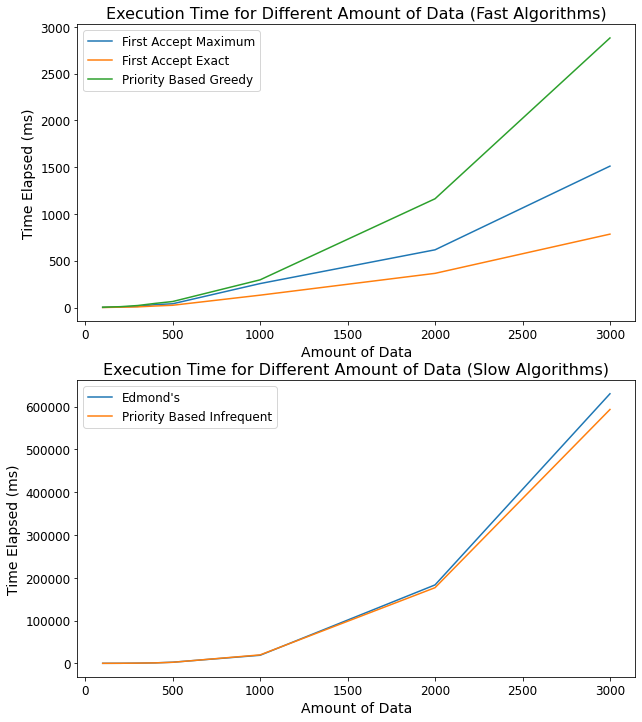

In [13]:
fig, ax = plt.subplots(nrows=2, ncols=1)

ax[0].set_xlabel("Amount of Data", fontsize=14)
ax[0].set_ylabel("Time Elapsed (ms)", fontsize=14)

ax[0].plot(fanway1_acc["time"], label="First Accept Maximum")
ax[0].plot(fanway2_acc["time"], label="First Accept Exact")
ax[0].plot(prio1_acc["time"], label="Priority Based Greedy")

ax[0].tick_params(labelsize=12)
ax[0].legend(fontsize=12)
ax[0].set_title("Execution Time for Different Amount of Data (Fast Algorithms)", fontsize=16)

ax[1].set_xlabel("Amount of Data", fontsize=14)
ax[1].set_ylabel("Time Elapsed (ms)", fontsize=14)

ax[1].plot(edmond_acc["time"], label="Edmond's")
ax[1].plot(prio2_acc["time"], label="Priority Based Infrequent")

ax[1].tick_params(labelsize=12)
ax[1].legend(fontsize=12)
ax[1].set_title("Execution Time for Different Amount of Data (Slow Algorithms)", fontsize=16)


fig.set_figwidth(10)
fig.set_figheight(12)